June 3rd, 2020:
The goal of this notebook is to create a process by which I can easily label photos of words that I have taken. It will take user input and turn it into something that is similiar to the IAM database. I am not sure that it has to be that complicated but there will be improvements in the future
One addition to be made will the ability to segment a particular line so that I can better identify what lines on a page look like.

In [1]:
from IPython.display import Image, display
import os
import cv2
from django.utils.crypto import get_random_string
import pandas as pd
import shutil
import datetime

In [2]:
def getListOfFiles(dirName):
    '''
    For the given path, get the List of all 
    files in the directory tree 
    '''
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
            
    return allFiles

In [3]:
csvdir = '/home/austin/Documents/Github/SimpleHTR/words_csv/'
dirName = '/home/austin/Documents/Github/SimpleHTR/words_screenshot/'
labeldir = '/home/austin/Documents/Github/SimpleHTR/words_screenshot_labeled/'

In [4]:
fileList = getListOfFiles(dirName)

In [5]:
def CreateImageLabel(file):
    display(Image(filename=file))
    height, width = cv2.imread(file).shape[0:2]
    truth = input('What word is this?: ')
    new_id = get_random_string(10)
    file_name = new_id + '.png'
    print('height: ' + str(height))
    print('width: ' + str(width))
    print('truth: ' + truth)
    while file_name in fileList:
        new_id = get_random_string(10)
    return([file_name,truth,height,width])

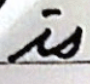

What word is this?: quit
height: 84
width: 90
truth: quit


In [7]:
df = pd.DataFrame(columns = ['file_name'
                            , 'truth'
                            , 'height'
                            , 'width'])
image_label = []
next_image = 'no'
truth = '...'
for file in fileList:
    if next_image == 'quit' or truth == 'quit':
        df.to_csv('csvdir'+str(datetime.datetime.now())+'.csv')
        break
    next_image = 'no'
    while next_image == 'no':
        image_label = CreateImageLabel(file)
        truth = image_label[1]
        if truth == 'quit':
            break
        next_image = input('does this look right?: ')
    shutil.move(file,labeldir+image_label[0])
    df.loc[len(df)] = image_label